In [1]:
import sys
sys.path.append('../../')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

import plots
from packages import general, bh, fmm

In [5]:
num_particles = 1000

terms_vals = np.arange(2, 10)

theta = 0.5

In [3]:
particles = [general.Particle(mass_like=True) for _ in range(num_particles)]

bh_times = []
fmm_times = []

for terms in terms_vals:
    print(f'terms: {terms}')
    bh_method = bh.BH(particles, theta, terms)
    time = %timeit -o bh_method.do_method()
    bh_times.append(time)
    fmm_method = fmm.FMM(particles, terms)
    time = %timeit -o fmm_method.do_method()
    fmm_times.append(time)

terms: 2
728 ms ± 13.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
198 ms ± 2.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
terms: 3
744 ms ± 10.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
198 ms ± 2.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
terms: 4
751 ms ± 18.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
204 ms ± 2.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
terms: 5
784 ms ± 23.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
216 ms ± 13.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
terms: 6
816 ms ± 19.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
213 ms ± 3.73 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
terms: 7
801 ms ± 22.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
227 ms ± 7.53 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
terms: 8
810 ms ± 18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
227 ms ± 2 ms per loop (mean ± std. dev. of 7 run

In [6]:
bh_averages = [time.average for time in bh_times]
bh_stdevs = [time.stdev for time in bh_times]
fmm_averages = [time.average for time in fmm_times]
fmm_stdevs = [time.stdev for time in fmm_times]

In [13]:
FILE_PATH = 'data/terms.npz'
np.savez(FILE_PATH,
    num_particles=num_particles,
    theta=theta,
    terms=terms,
    bh_averages=bh_averages,
    bh_stdevs=bh_stdevs,
    fmm_averages=fmm_averages,
    fmm_stdevs=fmm_stdevs,
    terms_vals=terms_vals
)

In [26]:
import importlib
importlib.reload(plots)

<module 'plots' from '/Users/liambrown/repositories/computing-project-lb880/tests/timings/plots.py'>

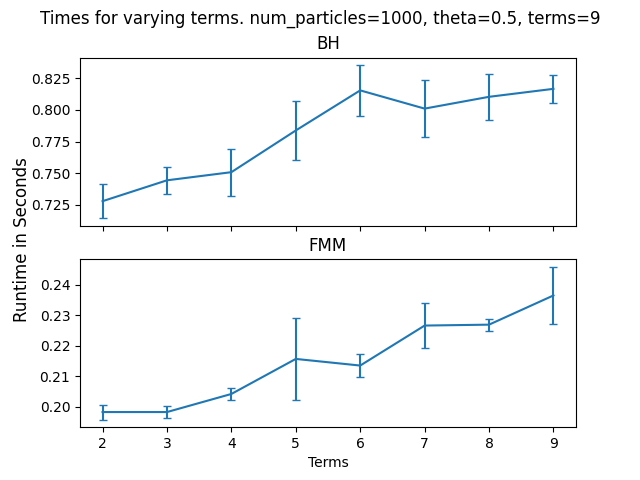

In [27]:
FILE_PATH = 'data/terms.npz'
fig = plots.terms(FILE_PATH)